# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

2024-06-10 06:50:11.597710: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 06:50:11.597761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 06:50:11.599201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Preparation

In [ ]:
'''import os
import pandas as pd

PATH = 'path_to_dataset/'

file_emotion = []
file_path = []

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

for emotion in emotions:
    emotion_folder = os.path.join(PATH, emotion)

    if os.path.isdir(emotion_folder):
        for file in os.listdir(emotion_folder):
            file_path.append(os.path.join(emotion_folder, file))
            file_emotion.append(emotion.lower())

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
pumave_df = pd.concat([emotion_df, path_df], axis=1)
pumave_df.to_csv("pumave_df.csv", index=False)
pumave_df.head()
'''

# Dataframe

In [2]:
import os
import pandas as pd

PATH = '/kaggle/input/emotion-dataset-language-wise/Audio Mode Only/'
file_emotion = []
file_path = []
file_language = []

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
languages = ['English', 'Hindi', 'Punjabi']

for emotion in emotions:
    emotion_folder = os.path.join(PATH, emotion)
    print(f"Checking emotion folder: {emotion_folder}")

    if os.path.isdir(emotion_folder):
        for language in languages:
            language_folder = os.path.join(emotion_folder, language)
            print(f"Checking language folder: {language_folder}")

            if os.path.isdir(language_folder):
                for file in os.listdir(language_folder):
                    file_full_path = os.path.join(language_folder, file)
                    file_path.append(file_full_path)
                    file_emotion.append(emotion.lower())
                    file_language.append(language)
            else:
                print(f"Language folder not found: {language_folder}")
    else:
        print(f"Emotion folder not found: {emotion_folder}")

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
language_df = pd.DataFrame(file_language, columns=['Language'])
crema_df = pd.concat([emotion_df, path_df, language_df], axis=1)
crema_df.to_csv("pumave.csv", index=False)
crema_df.head()


Checking emotion folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Anger
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Anger/English
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Anger/Hindi
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Anger/Punjabi
Checking emotion folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Disgust
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Disgust/English
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Disgust/Hindi
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Disgust/Punjabi
Checking emotion folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Fear
Checking language folder: /kaggle/input/emotion-dataset-language-wise/Audio Mode Only/Fear/English
Checking language folder:

,Emotions,Path,Language
0,anger,/kaggle/input/emotion-dataset-language-wise/Au...,English
1,anger,/kaggle/input/emotion-dataset-language-wise/Au...,English
2,anger,/kaggle/input/emotion-dataset-language-wise/Au...,English
3,anger,/kaggle/input/emotion-dataset-language-wise/Au...,English
4,anger,/kaggle/input/emotion-dataset-language-wise/Au...,English


In [16]:
for language in languages:
    language_df = crema_df[crema_df['Language'] == language]
    language_df.to_csv(f"{language.lower()}_crema_df.csv", index=False)

english_df = pd.read_csv("english_crema_df.csv")
hindi_df = pd.read_csv("hindi_crema_df.csv")
punjabi_df = pd.read_csv("punjabi_crema_df.csv")

print("English DataFrame")
print(english_df.head())

print("\nHindi DataFrame")
print(hindi_df.head())

print("\nPunjabi DataFrame")
print(punjabi_df.head())

English DataFrame
  Emotions                                               Path Language
0    anger  /kaggle/input/emotion-dataset-language-wise/Au...  English
1    anger  /kaggle/input/emotion-dataset-language-wise/Au...  English
2    anger  /kaggle/input/emotion-dataset-language-wise/Au...  English
3    anger  /kaggle/input/emotion-dataset-language-wise/Au...  English
4    anger  /kaggle/input/emotion-dataset-language-wise/Au...  English

Hindi DataFrame
  Emotions                                               Path Language
0    anger  /kaggle/input/emotion-dataset-language-wise/Au...    Hindi
1    anger  /kaggle/input/emotion-dataset-language-wise/Au...    Hindi
2    anger  /kaggle/input/emotion-dataset-language-wise/Au...    Hindi
3    anger  /kaggle/input/emotion-dataset-language-wise/Au...    Hindi
4    anger  /kaggle/input/emotion-dataset-language-wise/Au...    Hindi

Punjabi DataFrame
  Emotions                                               Path Language
0    anger  /kaggle/inp

In [22]:
english_df = english_df.drop('Language', axis=1)
english_df.head()

,Emotions,Path
0,anger,/kaggle/input/emotion-dataset-language-wise/Au...
1,anger,/kaggle/input/emotion-dataset-language-wise/Au...
2,anger,/kaggle/input/emotion-dataset-language-wise/Au...
3,anger,/kaggle/input/emotion-dataset-language-wise/Au...
4,anger,/kaggle/input/emotion-dataset-language-wise/Au...


In [24]:
hindi_df = hindi_df.drop('Language', axis = 1)
hindi_df.head()


,Emotions,Path
0,anger,/kaggle/input/emotion-dataset-language-wise/Au...
1,anger,/kaggle/input/emotion-dataset-language-wise/Au...
2,anger,/kaggle/input/emotion-dataset-language-wise/Au...
3,anger,/kaggle/input/emotion-dataset-language-wise/Au...
4,anger,/kaggle/input/emotion-dataset-language-wise/Au...


In [25]:
punjabi_df = punjabi_df.drop('Language', axis = 1)
punjabi_df.head()

,Emotions,Path
0,anger,/kaggle/input/emotion-dataset-language-wise/Au...
1,anger,/kaggle/input/emotion-dataset-language-wise/Au...
2,anger,/kaggle/input/emotion-dataset-language-wise/Au...
3,anger,/kaggle/input/emotion-dataset-language-wise/Au...
4,anger,/kaggle/input/emotion-dataset-language-wise/Au...


In [ ]:
'''import os
import pandas as pd

PATH = '/kaggle/input/indian-emotion/Audio Mode Only/'
file_emotion = []
file_path = []

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

for emotion in emotions:
    emotion_folder = os.path.join(PATH, emotion)
    print(f"Checking folder: {emotion_folder}") 
    
    if os.path.isdir(emotion_folder):
        for file in os.listdir(emotion_folder):
            file_full_path = os.path.join(emotion_folder, file)
            #print(f"Found file: {file_full_path}") 
            file_path.append(file_full_path)
            file_emotion.append(emotion.lower())
    else:
        print(f"Folder not found: {emotion_folder}")

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.to_csv("crema_df.csv", index=False)
crema_df.head()
'''


# Data Visualisation and Exploration

In [ ]:
#crema_df.to_csv('/kaggle/working/pumave.csv', index=False)


In [3]:
#crema_df.shape

(1233, 3)

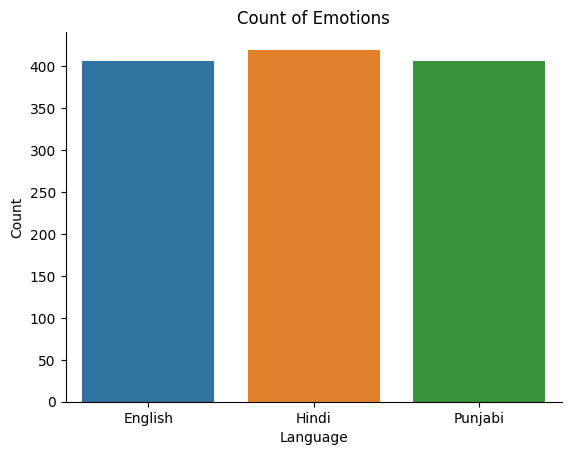

In [5]:
plt.title('Count of Emotions')
sns.countplot(x = crema_df.Language)
plt.ylabel('Count')
plt.xlabel('Language')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

In [6]:
def waveplot(data, sr, e):
  plt.figure(figsize = (10, 3))
  plt.title(f"{e} audio waveplot")
  librosa.display.waveshow(data, sr = sr)

def spectrogram(data, sr, e):
  X = librosa.stft(data)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize = (12, 3))
  plt.title(f"{e} audio spectrogram")
  librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')

In [7]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

def waveplot(data, sr, emotion, ax):
    librosa.display.waveshow(data, sr=sr, ax=ax)
    ax.set_title(f'Waveform ({emotion})')

def spectrogram(data, sr, emotion, ax):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(f'Spectrogram ({emotion})')
    return img


In [8]:
crema_df['Emotions'].unique()

array(['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

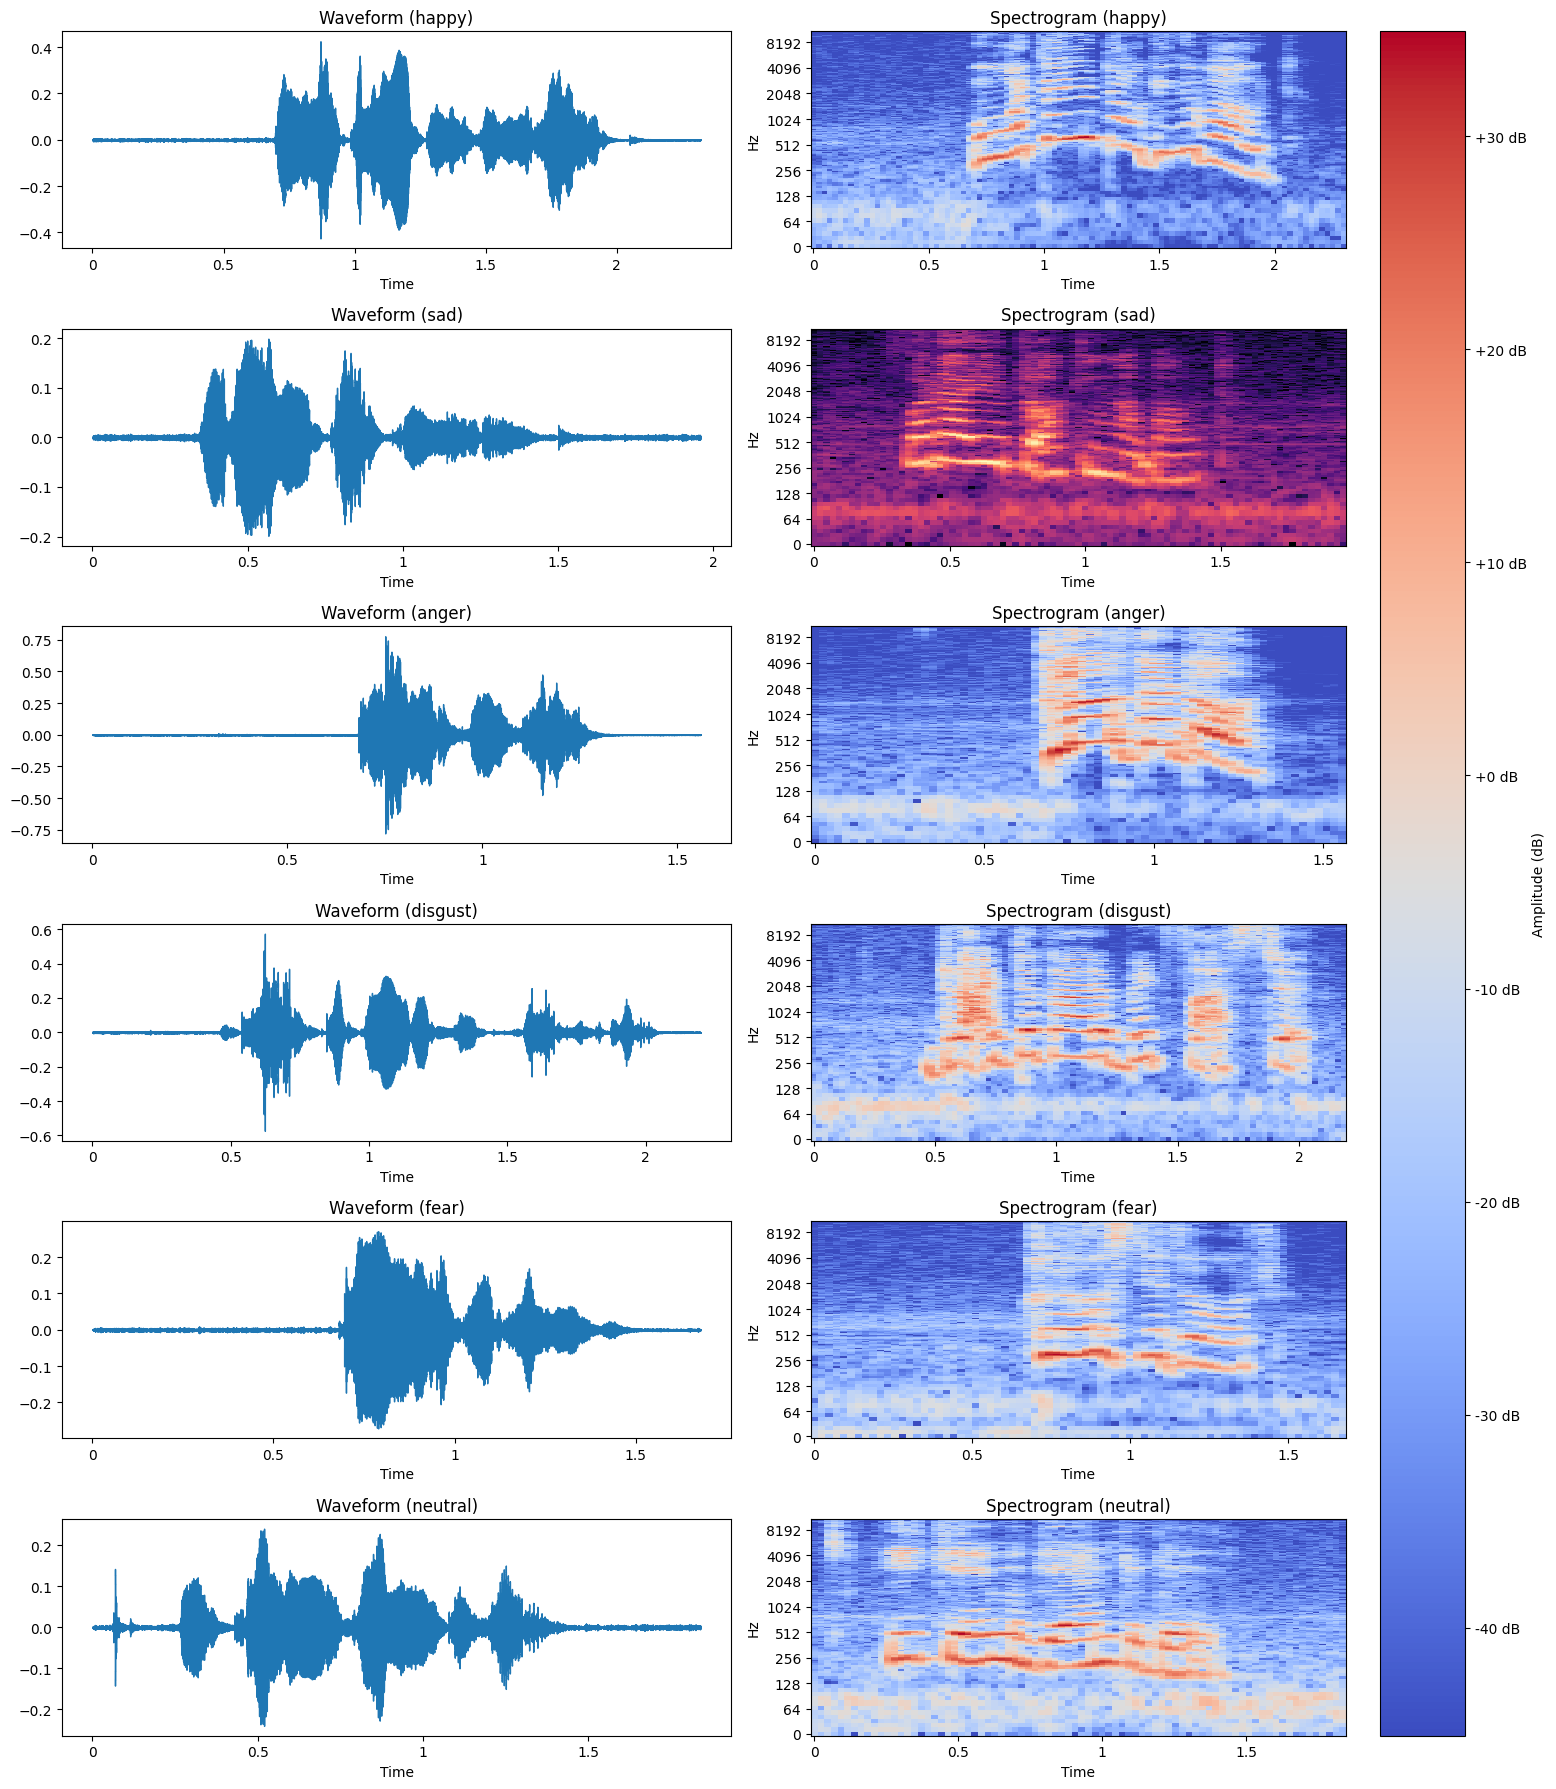

In [9]:
emotions = ['happy', 'sad', 'anger', 'disgust', 'fear', 'neutral']
fig, axs = plt.subplots(len(emotions), 2, figsize=(15, 3 * len(emotions)))

for i, emotion in enumerate(emotions):
    emotion_paths = crema_df.Path[crema_df.Emotions == emotion]
    if not emotion_paths.empty:
        path = np.array(emotion_paths)[0]  # Take the first path
        data, sr = librosa.load(path)
        waveplot(data, sr, emotion, axs[i, 0])
        img = spectrogram(data, sr, emotion, axs[i, 1])
    else:
        print(f"No paths found for emotion '{emotion}'")

plt.tight_layout()
cbar = fig.colorbar(img, ax=axs[:, 1], format="%+2.0f dB")
cbar.ax.set_ylabel('Amplitude (dB)')
plt.show()

In [ ]:
'''#some issue with indexes
emotions = ['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral']
fig, axs = plt.subplots(len(emotions), 2, figsize=(15, 3 * len(emotions)))
for i, emotion in enumerate(emotions):
    path = np.array(crema_df.Path[crema_df.Emotions == emotion])[1]
    data, sr = librosa.load(path)
    waveplot(data, sr, emotion, axs[i, 0])
    img = spectrogram(data, sr, emotion, axs[i, 1])
plt.tight_layout()
cbar = fig.colorbar(img, ax=axs[:, 1], format="%+2.0f dB")
cbar.ax.set_ylabel('Amplitude (dB)')
plt.show()'''


# Data Augmentation

In [10]:
def noise(data):
  noise_amp = 0.035 * np.random.uniform() * np.amax(data)
  data = data + noise_amp * np.random.normal(size = data.shape[0])
  return data

def stretch(data, rate = 0.8):
  return librosa.effects.time_stretch(data, rate = rate)

def shift(data):
  shift_range = int(np.random.uniform(low = -5, high = 5) * 1000)
  return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps = 0.7):
  return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = n_steps)

path = np.array(crema_df.Path)[1]
data, sample_rate = librosa.load(path)

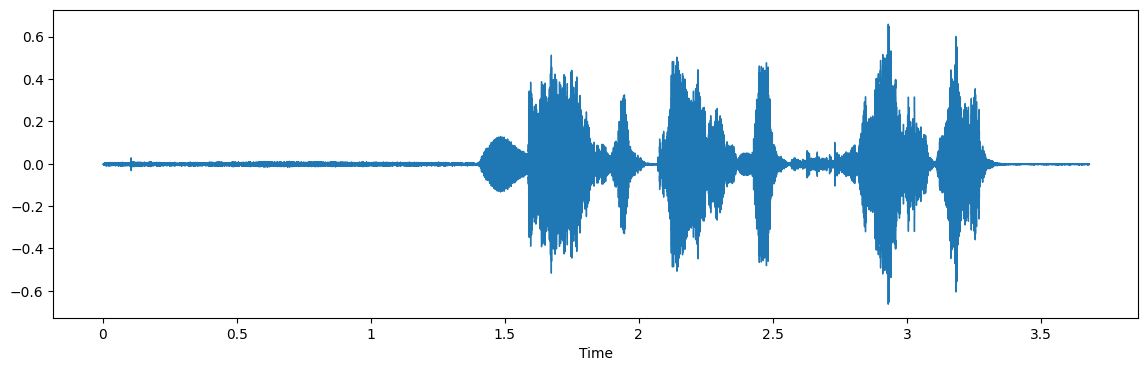

In [11]:
# Simple audio
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = data, sr = sample_rate)
Audio(path)

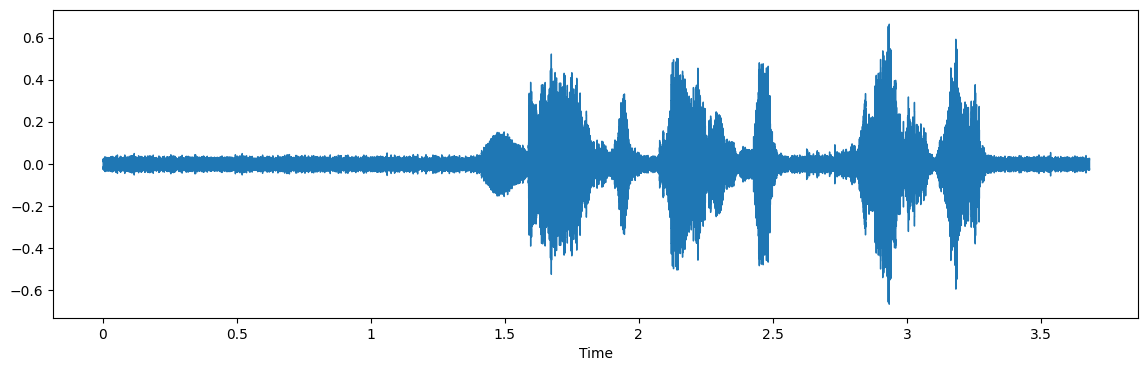

In [12]:
# Noise
x = noise(data)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

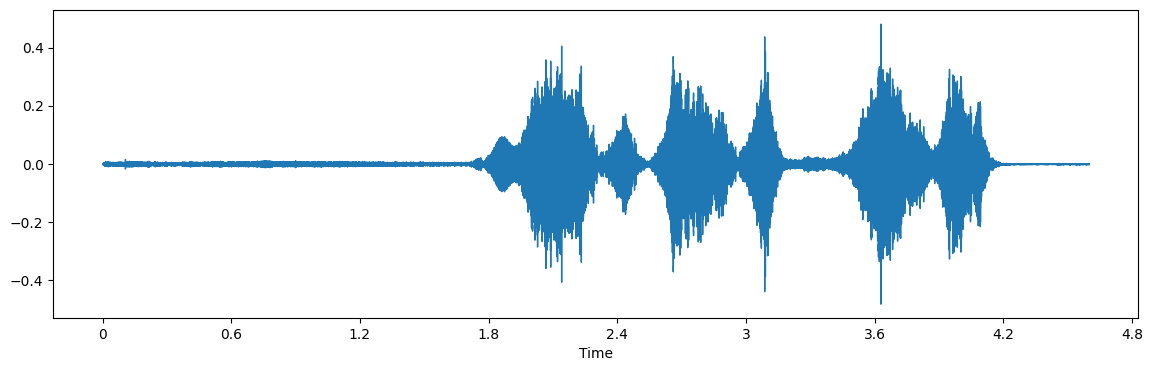

In [13]:
# Stretch
x = stretch(data)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

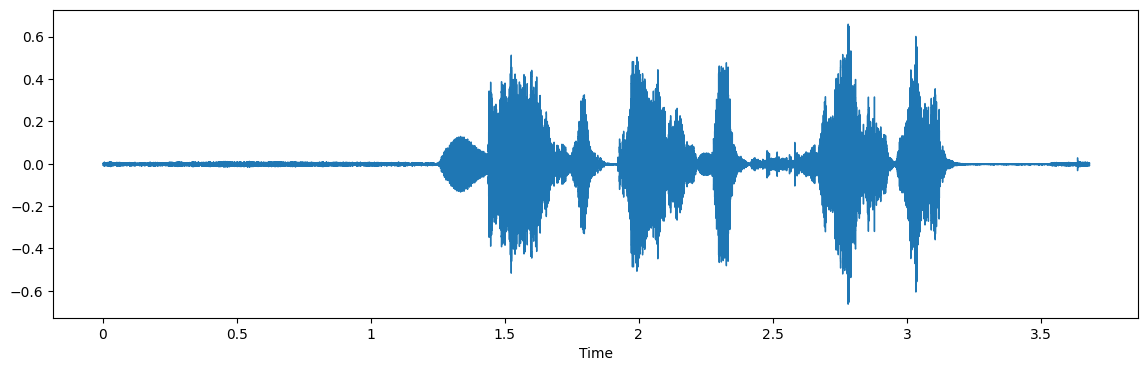

In [14]:
# Shift
x = shift(data)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

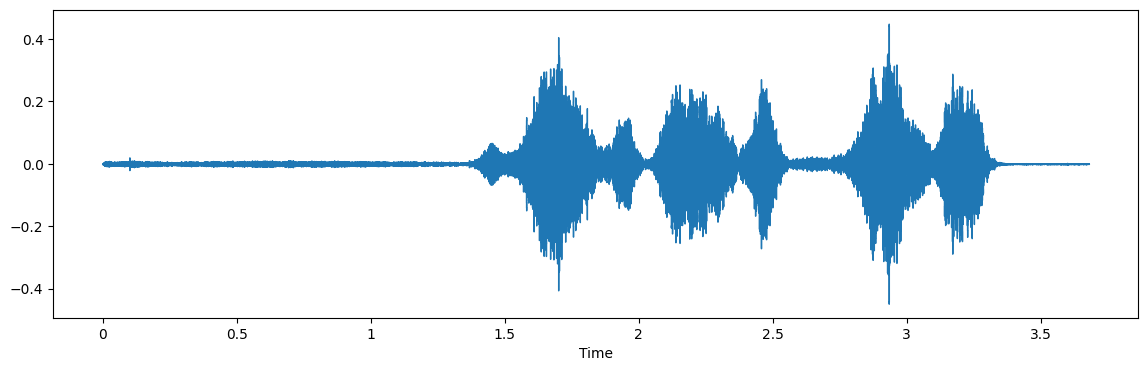

In [15]:
# Pitch
x = pitch(data, sampling_rate = sample_rate)
plt.figure(figsize = (14, 4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

# Feature Extraction

In [ ]:
def extract_features(data):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = 20).T, axis = 0)
    result = np.hstack((result, mfcc))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration = 2.5, offset = 0.6)

    res1 = extract_features(data)
    result = np.array(res1)

    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    lowspeed_data = stretch(data, rate = 0.7)
    res3 = extract_features(lowspeed_data)
    result = np.vstack((result, res3))

    highspeed_data = stretch(data, rate = 1.25)
    res4 = extract_features(highspeed_data)
    result = np.vstack((result, res4))

    pitch_data = pitch(data, sample_rate, n_steps = 0.8)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    shift_data = shift(data)
    res6 = extract_features(shift_data)
    result = np.vstack((result, res6))

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(crema_df.Path, crema_df.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [ ]:
from concurrent.futures import ThreadPoolExecutor

def process_audio_file(path, emotion, X, Y):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
    return (path, emotion)

if __name__ == "__main__":
    X, Y = [], []
    with ThreadPoolExecutor() as executor:
        futures = []
        for path, emotion in zip(crema_df.Path, crema_df.Emotions):
            future = executor.submit(process_audio_file, path, emotion, X, Y)
            futures.append(future)

        for future in futures:
            path, emotion = future.result()
#             print(path, " : ", emotion)

In [ ]:
len(X), len(Y), crema_df.Path.shape

In [ ]:
features = pd.DataFrame(X)
features['labels'] = Y
features.to_csv('features.csv', index = False)
features.head()

# Data Preparation

In [ ]:
X = features.iloc[: ,: -1].values
Y = features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, shuffle = True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Modelling

In [ ]:
# model = Sequential([
#     Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)),
#     MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
#     Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
#     MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
#     Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'),
#     MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
#     Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'),
#     MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
#     Flatten(),
#     Dense(units=32, activation='relu'),
#     Dropout(0.3),
#     Dense(units=6, activation='softmax'),
# ])

# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# model.summary()

In [ ]:
model = Sequential([
    Conv1D(64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu',input_shape = (x_train.shape[1], 1)),
    Conv1D(64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    Dropout(0.25),
    MaxPooling1D(pool_size = 2, strides = 2, padding = 'same'),
    
    Conv1D(128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    Conv1D(128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    Conv1D(128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    Dropout(0.25),
    MaxPooling1D(pool_size = 2, strides = 2, padding = 'same'),
    
    Conv1D(256, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'),
    
    Flatten(),
    Dense(units = 6, activation = 'softmax'),
    
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.0000001)
mdcp = ModelCheckpoint('best_model_weights.keras', monitor='val_accuracy', save_best_only=True)
#early_stop = EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp, mdcp])

In [ ]:
print("Testing Accuracy: " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

print(classification_report(y_test, y_pred))